# 1) Import Packages

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, LeavePOut
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

In [2]:
# importing dataset
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Attribute Information:

    1) ID number
    2) Diagnosis (M = malignant, B = benign)
    3-32)

    Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

    The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

# 2) Data Preprocessing

In [6]:
df[df.isnull()].sum()

id                         0.0
diagnosis                    0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
Unnamed:

### 2.1) Dealing with missing values

In [7]:
df.isnull().sum().sum()  # Checking missing values/

569

In [8]:
df.columns[df.isnull().any()]  # Columns with null values

Index(['Unnamed: 32'], dtype='object')

In [9]:
df['Unnamed: 32'].isnull().mean()*100    # Percentage of null values  in the columns

100.0

In [10]:
df = df.drop(columns='Unnamed: 32')

### 2.2) Dealing with categorical data

In [11]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

There are only two values M = malignant, B = benign

In [13]:
df['diagnosis'].nunique()

2

#### Performing one-hot encoding (0,1)

In [14]:
df['diagnosis'] = pd.get_dummies(data=df['diagnosis'], drop_first=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


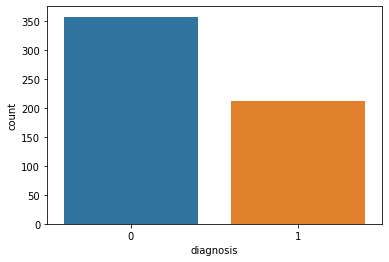

In [15]:
sns.countplot(x = df['diagnosis'], label='Count')
plt.show()

In [16]:
print((df.diagnosis==1).sum())  # Maliganant
print((df.diagnosis==0).sum())  # Benign

212
357


## 2.3) Creating Correlation matrix and heatmap

In [17]:
df1 = df.drop(columns='diagnosis')

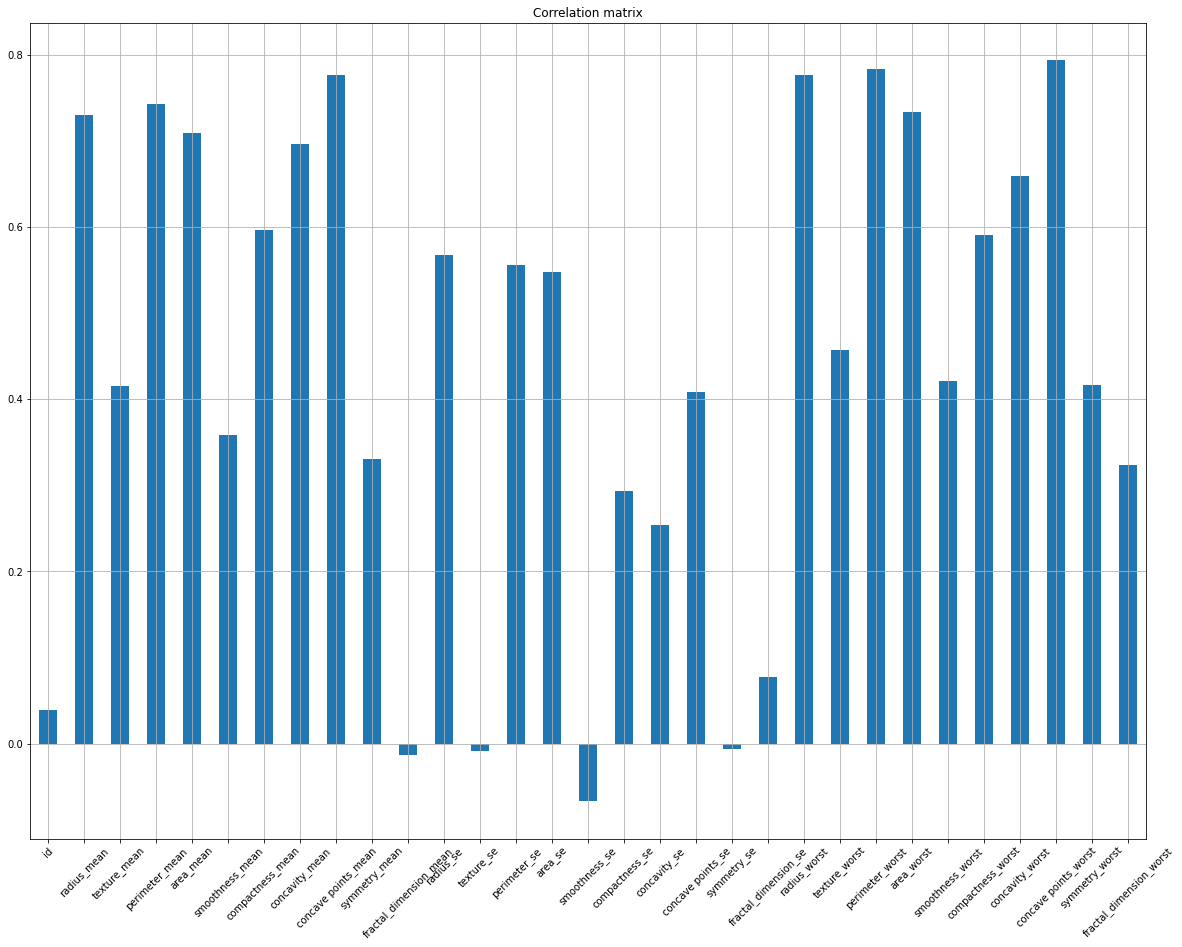

In [18]:
df1.corrwith(df['diagnosis']).plot.bar(figsize=(20,15), title = 'Correlation matrix',rot=45,grid=True)
plt.show()

In [19]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


#### Plotting heatmap

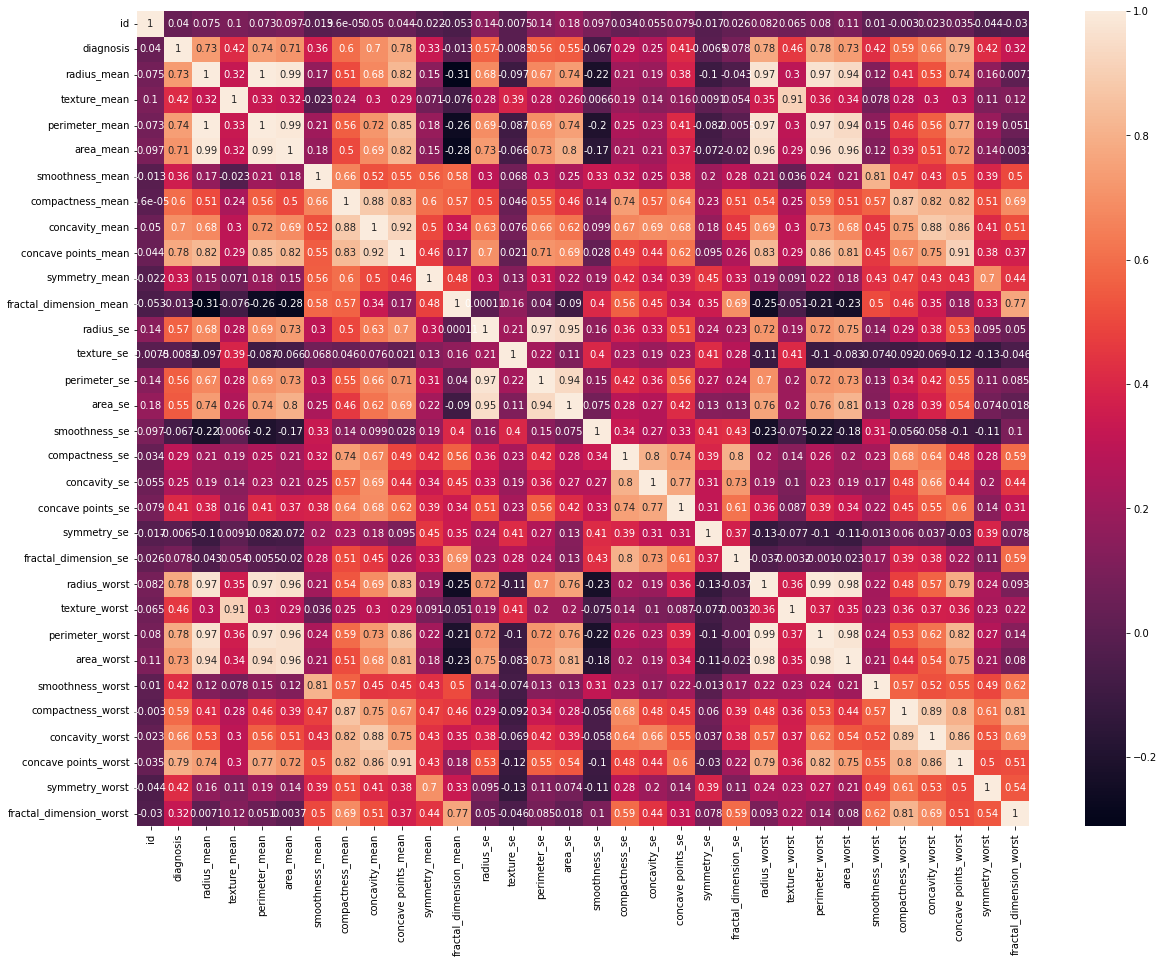

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

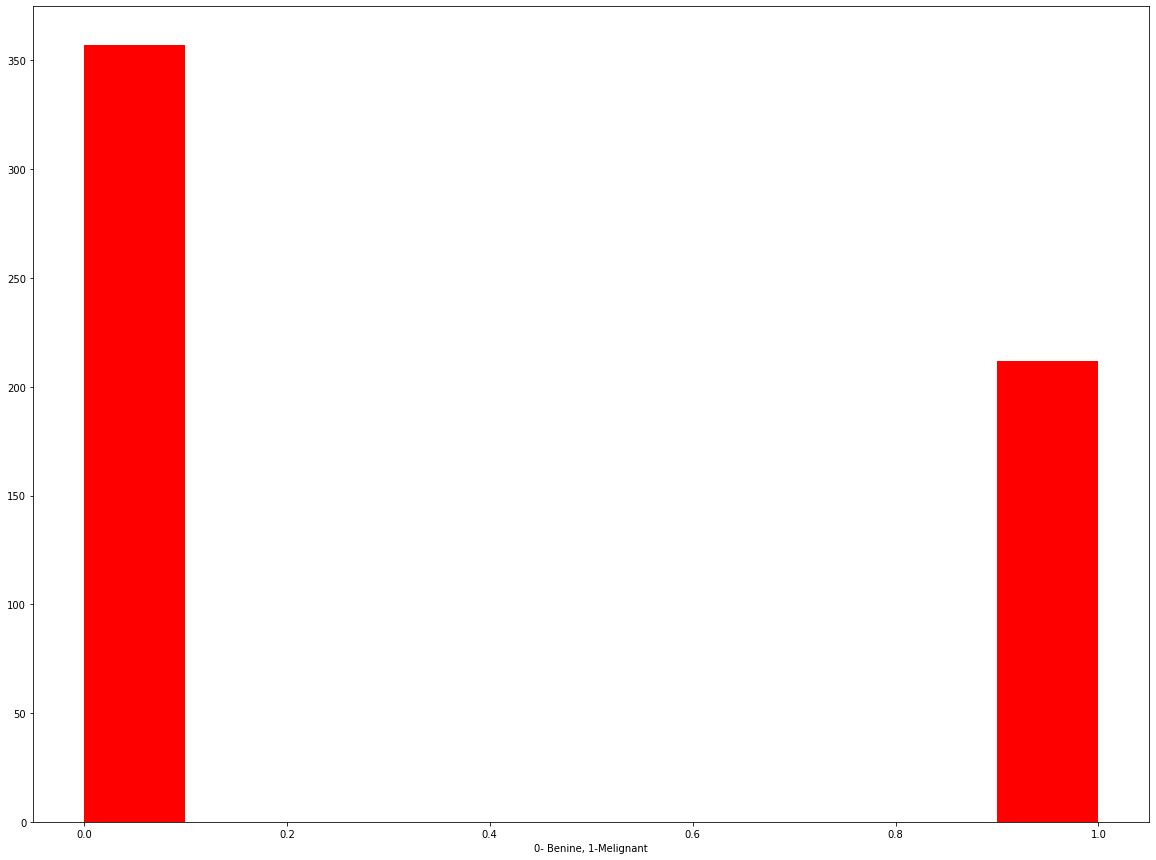

In [29]:
plt.figure(figsize=(20,15))
plt.hist(df['diagnosis'], bins=10,color='red')
plt.xlabel("0- Benine, 1-Melignant")
plt.yla
plt.show()

## 2.4) Splitting data 

##### Matrix of feature / independent 

In [15]:
X = df.iloc[:,2:-1].values

##### Target variable / dependent variable

In [16]:
Y = df.iloc[:,1].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## 2.5) Feature Scaling

In [18]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)  # calculating mean and standard devation
x_test = scalar.transform(x_test)        # To avoid overfitting

#   To avoid overfitting we use fit.transform in training set and 
#   in testing we use only transform

# 3) Model building

We will use different models is this logistic and randomforest algorithm

## 3.1) Logistic Regression

In [45]:
log_r = LogisticRegression(random_state=0)

#### Training model

In [46]:
log_r.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [47]:
y_pred_log = log_r.predict(x_test)

### Analysing model 

##### Confusion matrix
To check the number of correct predections and incorrect predictions

In [48]:
confusion_matrix_l = confusion_matrix(y_test,y_pred_log)
confusion_matrix_l

array([[65,  2],
       [ 3, 44]], dtype=int64)

##### Accuacy score
It will calculate the accuracy of the model

In [49]:
ascore = accuracy_score(y_test,y_pred_log)

##### f1_score 
    Also knowns as balanced F-score, Best value is 1 and worst value is 0
    formula = f1= 2 * (precision * recall)/precison + recall


In [50]:
f1 = f1_score(y_test,y_pred_log)

##### precision score
tp/(tp+fn)

In [51]:
prec = precision_score(y_test,y_pred_log)

##### recall score

In [52]:
rec = recall_score(y_test,y_pred_log)

In [53]:
results = pd.DataFrame([['Logistic Regression', ascore, f1, prec, rec]],
                      columns=['Model','Accuracy','F1_score',
                              'Precision', 'Recall'])

In [54]:
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.95614,0.946237,0.956522,0.93617


#### Cross Validation Score
Evaluate score by cross-validation

In [55]:
accuracy = cross_val_score(estimator = log_r, X = x_train, y = y_train, cv = 10)

In [56]:
print(accuracy.mean()*100, 'Accuracy')
print(accuracy.std()*100, 'standard deviation')

97.80676328502416 Accuracy
1.9770439179502723 standard deviation


## 3.2) Ensemble method RandomForest 

In [19]:
erf1 = RandomForestClassifier(n_estimators=10, max_depth=2,n_jobs=-1)

In [ ]:
leave_pout = LeavePOut(p = 2)
leave_pout.get_n_splits(X)
score = cross_val_score(erf1,X,Y,cv=leave_pout)

In [57]:
erf = RandomForestClassifier(random_state=0)
erf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [58]:
y_pred_r = erf.predict(x_test)

#### Analysing model 

In [59]:
ascore = accuracy_score(y_test,y_pred_r)
f1 = f1_score(y_test,y_pred_r)
prec = precision_score(y_test,y_pred_r)
rec = recall_score(y_test,y_pred_r)

In [60]:
results_RF = pd.DataFrame([['RandomForest', ascore, f1, prec, rec]],
                      columns=['Model','Accuracy','F1_score',
                              'Precision', 'Recall'])

In [61]:
results = results.append(results_RF,ignore_index=True)

In [62]:
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,RandomForest,0.964912,0.958333,0.938776,0.978723


To decide the final model we will do cross validation

In [63]:
accuracy_r = cross_val_score(estimator = erf, X = x_train, y = y_train, cv = 10)
print(accuracy_r.mean()*100, 'Accuracy')
print(accuracy_r.std()*100, 'Standard deviation')

96.27053140096619 Accuracy
2.785877709407978 Standard deviation


In [64]:
confusion_matrix_r = confusion_matrix(y_test,y_pred_r)
confusion_matrix_r

array([[64,  3],
       [ 1, 46]], dtype=int64)

    So as compared to Logistic model and Random forest model the accuracy and standard devation of the logistic regression showed the best results.
        Decisions of cross validation are :-

## 3.3) Naive Bayes

In [65]:
nb = GaussianNB()

In [66]:
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

In [67]:
ascore = accuracy_score(y_test,y_pred_nb)
f1 = f1_score(y_test,y_pred_nb)
prec = precision_score(y_test,y_pred_nb)
rec = recall_score(y_test,y_pred_nb)

In [68]:
results_nb = pd.DataFrame([['Naive Bayes', ascore, f1, prec, rec]],
                      columns=['Model','Accuracy','F1_score',
                              'Precision', 'Recall'])

In [69]:
results = results.append(results_nb)
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,RandomForest,0.964912,0.958333,0.938776,0.978723
0,Naive Bayes,0.912281,0.893617,0.893617,0.893617


In [70]:
accuracy_nb = cross_val_score(estimator = nb, X = x_train, y = y_train, cv = 10)
print(accuracy_nb.mean()*100, 'Accuracy')
print(accuracy_nb.std()*100, 'Standard deviation')

95.17874396135267 Accuracy
2.5290028099016366 Standard deviation


## 3.4) Support Vector Machine

In [71]:
svm = SVC(kernel='linear', C=0.025, random_state=0)

In [72]:
svm.fit(x_train,y_train)

SVC(C=0.025, kernel='linear', random_state=0)

In [73]:
y_pred_svm = svm.predict(x_test)

In [74]:
ascore = accuracy_score(y_test,y_pred_svm)
f1 = f1_score(y_test,y_pred_svm)
prec = precision_score(y_test,y_pred_svm)
rec = recall_score(y_test,y_pred_svm)

In [75]:
results_svm = pd.DataFrame([['SVM', ascore, f1, prec, rec]],
                      columns=['Model','Accuracy','F1_score',
                              'Precision', 'Recall'])

In [76]:
results = results.append(results_svm)
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,RandomForest,0.964912,0.958333,0.938776,0.978723
0,Naive Bayes,0.912281,0.893617,0.893617,0.893617
0,SVM,0.964912,0.955556,1.000000,0.914894


In [77]:
accuracy_svm = cross_val_score(estimator = svm, X = x_train, y = y_train, cv = 10)
print(accuracy_svm.mean()*100, 'Accuracy')
print(accuracy_svm.std()*100, 'Standard deviation')

97.58937198067633 Accuracy
2.2958247873425117 Standard deviation


### All results

In [78]:
final_results = pd.DataFrame([['Logistic Regression',accuracy.mean()*100,accuracy.std()*100]],
            columns=['Model','Accuracy','Standard devation'])

final_results2 = pd.DataFrame([['Random Forest',accuracy_r.mean()*100,accuracy_r.std()*100]],
            columns=['Model','Accuracy','Standard devation'])

results_nb = pd.DataFrame([['Naive Bayes',accuracy_nb.mean()*100,accuracy_nb.std()*100]],
            columns=['Model','Accuracy','Standard devation'])

cv_result_svm = pd.DataFrame([['SVM',accuracy_svm.mean()*100,accuracy_svm.std()*100]],
            columns=['Model','Accuracy','Standard devation'])
                               
final_results = final_results.append(final_results2,ignore_index=True)
final_results = final_results.append(results_nb,ignore_index=True)
final_results = final_results.append(cv_result_svm,ignore_index=True)

final_results

,Model,Accuracy,Standard devation
0,Logistic Regression,97.806763,1.977044
1,Random Forest,96.270531,2.785878
2,Naive Bayes,95.178744,2.529003
3,SVM,97.589372,2.295825


    So model is Logistic Regression, next we will hyper tune the parameters

### Hyperparameter Tuning
     In contrast to GridSearchCV, not all parameter values are tried out, but     rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [79]:
parameters = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

In [80]:
random_search = RandomizedSearchCV(estimator=log_r, param_distributions=parameters,n_iter=10,
                                   scoring='roc_auc', n_jobs=-1, cv=10, verbose=3)

In [81]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logist

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [82]:
random_search.best_score_

0.9960953346855984

In [83]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 1.75}

In [84]:
random_search.best_estimator_

LogisticRegression(C=1.75, penalty='l1', random_state=0, solver='saga')

In [85]:
log_r1 = LogisticRegression(C=1.5, penalty='l1', random_state=0, solver='saga')
log_r1.fit(x_train,y_train)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.5, penalty='l1', random_state=0, solver='saga')

In [86]:
y_pred1 = log_r1.predict(x_test)

In [87]:
ascore = accuracy_score(y_test,y_pred1)
f1 = f1_score(y_test,y_pred1)
prec = precision_score(y_test,y_pred1)
rec = recall_score(y_test,y_pred1)

In [88]:
results_final = pd.DataFrame([['Logistic Regression_HyperTuned', ascore, f1, prec, rec]],
                      columns=['Model','Accuracy','F1_score',
                              'Precision', 'Recall'])

In [89]:
results.append(results_final,ignore_index=True)

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,RandomForest,0.964912,0.958333,0.938776,0.978723
2,Naive Bayes,0.912281,0.893617,0.893617,0.893617
3,SVM,0.964912,0.955556,1.000000,0.914894
4,Logistic Regression_HyperTuned,0.956140,0.946237,0.956522,0.936170


In [90]:
accuracy_r = cross_val_score(estimator = log_r1, X = x_train, y = y_train, cv = 10)
print(accuracy_r.mean()*100, 'Accuracy')
print(accuracy_r.std()*100, 'Standard deviation')

98.2415458937198 Accuracy
2.1637119756121757 Standard deviation


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\envs\tensor

In [91]:
cv_result_L_R_HT = pd.DataFrame([['L_R Hyper tuned',accuracy_r.mean()*100,accuracy_r.std()*100]],
            columns=['Model','Accuracy','Standard devation'])

In [92]:
final_results = final_results.append(cv_result_L_R_HT,ignore_index=True)
final_results

,Model,Accuracy,Standard devation
0,Logistic Regression,97.806763,1.977044
1,Random Forest,96.270531,2.785878
2,Naive Bayes,95.178744,2.529003
3,SVM,97.589372,2.295825
4,L_R Hyper tuned,98.241546,2.163712


## Neural Network

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [93]:
# importing dataset
df = pd.read_csv('data.csv')
df = df.drop(columns=['id','Unnamed: 32'])

In [94]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [95]:
print(df.columns)
print('\n\n\n',df.columns.isnull())

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')



 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]


In [96]:
# Splitting data

# object to int
df['diagnosis'].replace(['M', 'B'],[1,0], inplace=True)
X = df.iloc[:,1:]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [97]:
# Preprocessing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Define Model architecture

In [98]:
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [99]:
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [101]:
# Train model
model.fit(X_train, y_train, epochs=1000, batch_size=20, verbose=0)

In [102]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 1.1642 - accuracy: 0.9649
Loss: 1.1642460823059082
Accuracy: 0.9649122953414917
